<h1><center> iMet Collection 2019 Challenge - EDA </center></h1>

### Installing Packages

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding Data

In [3]:
#Loading the data
df = pd.read_csv('/Users/preethibharathy/Documents/PreethiBharathy/UCF/Fall22/CV/CV_Project/iMet_data/train.csv')
submission_df = pd.read_csv('/Users/preethibharathy/Documents/PreethiBharathy/UCF/Fall22/CV/CV_Project/iMet_data/sample_submission.csv')
labels_df = pd.read_csv('/Users/preethibharathy/Documents/PreethiBharathy/UCF/Fall22/CV/CV_Project/iMet_data/labels.csv')

In [4]:
#checking shape of train, test and labels
print("Dataset shape:", df.shape)
print("Submission file shape:", submission_df.shape)
print("labels data shape:", labels_df.shape)

Dataset shape: (109237, 2)
Submission file shape: (7443, 2)
labels data shape: (1103, 2)


In [5]:
#Display the data
print("Head of Dataset:\n", df.head(10))
print("Head of submission file:\n", submission_df.head(10))
print("Head of lables data:\n", labels_df.head(10))

Head of Dataset:
                  id             attribute_ids
0  1000483014d91860               147 616 813
1  1000fe2e667721fe            51 616 734 813
2  1001614cb89646ee                       776
3  10041eb49b297c08       51 671 698 813 1092
4  100501c227f8beea       13 404 492 903 1093
5  10050ed12fbad46d      189 279 774 800 1051
6  100543a032517972                  188 1034
7   1006665c0aad488                 1010 1053
8  1007057734dba6df           189 541 542 993
9  1008abd71f3ed5bc  70 776 794 813 1046 1092
Head of submission file:
                  id attribute_ids
0  10023b2cc4ed5f68         0 1 2
1  100fbe75ed8fd887         0 1 2
2  101b627524a04f19         0 1 2
3  10234480c41284c6         0 1 2
4  1023b0e2636dcea8         0 1 2
5   1039cd6cf85845c         0 1 2
6   103a5b3f83fbe88         0 1 2
7  10413aaae8d6a9a2         0 1 2
8  10423822b93a65ab         0 1 2
9  1052bf702cb099f7         0 1 2
Head of lables data:
    attribute_id                   attribute_name
0    

<b> The submissions.csv file is just a format in which the results are to be sumbitted for the kaggle challenge.
    This file will not be used. </b>


<h3> Exploring labels </h3>



In [6]:
#Number of unique labels
labels_df.nunique()

attribute_id      1103
attribute_name    1103
dtype: int64

<i> There are 1103 unique lables </i>

In [7]:
labels_df.head(5)

,attribute_id,attribute_name
0,0,culture::abruzzi
1,1,culture::achaemenid
2,2,culture::aegean
3,3,culture::afghan
4,4,culture::after british


Noticed that attribute_name is a key value pair, spliting this column to extract these key value pairs in two different columns.

In [8]:
labels_df[['attribute_key', 'attribute_description']] = labels_df.attribute_name.str.split("::", expand = True)

In [9]:
labels_df.head(5)

,attribute_id,attribute_name,attribute_key,attribute_description
0,0,culture::abruzzi,culture,abruzzi
1,1,culture::achaemenid,culture,achaemenid
2,2,culture::aegean,culture,aegean
3,3,culture::afghan,culture,afghan
4,4,culture::after british,culture,after british


In [10]:
labels_df.attribute_key.value_counts()

tag        705
culture    398
Name: attribute_key, dtype: int64

<AxesSubplot:>

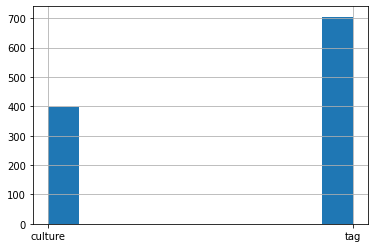

In [11]:
labels_df.attribute_key.hist()

In [12]:
tag_percent = (labels_df.attribute_key.value_counts()['tag'])/(labels_df.attribute_key.count())

In [13]:
print(f"percentage of tag labels: {tag_percent:.2%}")

percentage of tag labels: 63.92%


In [14]:
culture_percent = (labels_df.attribute_key.value_counts()['culture'])/(labels_df.attribute_key.count())

In [15]:
print(f"percentage of culture labels: {culture_percent:.2%}")

percentage of culture labels: 36.08%


**The ratio of culture labels are more than tags!**

<h5> Extract culture labels </h5>

In [16]:
labels_culture = labels_df.head(398)

In [17]:
labels_culture

,attribute_id,attribute_name,attribute_key,attribute_description
0,0,culture::abruzzi,culture,abruzzi
1,1,culture::achaemenid,culture,achaemenid
2,2,culture::aegean,culture,aegean
3,3,culture::afghan,culture,afghan
4,4,culture::after british,culture,after british
...,...,...,...,...
393,393,culture::worcester,culture,worcester
394,394,culture::wurzburg,culture,wurzburg
395,395,culture::zenu,culture,zenu
396,396,culture::zoroastrian,culture,zoroastrian


In [19]:
#write this into a csv
labels_culture.to_csv('/Users/preethibharathy/Documents/PreethiBharathy/UCF/Fall22/CV/CV_Project/iMet_data/label_culture.csv')  

<h5> Extract tag labels </h5>

In [21]:
labels_tag = labels_df.iloc[398:]

In [22]:
labels_tag.to_csv('/Users/preethibharathy/Documents/PreethiBharathy/UCF/Fall22/CV/CV_Project/iMet_data/labels_tag.csv')  

<h3> Count of labels for each image in the dataset </h3>

In [23]:
df['attribute_ids'].values

array(['147 616 813', '51 616 734 813', '776', ..., '156 763', '121 433',
       '462 733 813 1020'], dtype=object)

In [24]:
df['attribute_ids'].value_counts

<bound method IndexOpsMixin.value_counts of 0                 147 616 813
1              51 616 734 813
2                         776
3         51 671 698 813 1092
4         13 404 492 903 1093
                 ...         
109232            121 432 724
109233        189 511 813 896
109234                156 763
109235                121 433
109236       462 733 813 1020
Name: attribute_ids, Length: 109237, dtype: object>

<i> The training data contains the image ids and the labels associated with them. 

   Each image has multiply labels associated with it where each label describes an attribute of the image.

   
   For example, <b> id: 1 Lables: 51 616 734 813 </b> In the above example, for the image id 1, there are 4 labels associated with it {51, 616, 734, 813} which describes the image.
</i>

In [26]:
df.head(10)

,id,attribute_ids
0,1000483014d91860,147 616 813
1,1000fe2e667721fe,51 616 734 813
2,1001614cb89646ee,776
3,10041eb49b297c08,51 671 698 813 1092
4,100501c227f8beea,13 404 492 903 1093
5,10050ed12fbad46d,189 279 774 800 1051
6,100543a032517972,188 1034
7,1006665c0aad488,1010 1053
8,1007057734dba6df,189 541 542 993
9,1008abd71f3ed5bc,70 776 794 813 1046 1092


In [27]:
#Splitting the attribute ids into different rows for each image I
df2 = (df.set_index(['id'])
   .apply(lambda x: x.str.split(' ').explode())
   .reset_index())  

In [28]:
#finding the count of attributes for each image I
df2['attribute_id_Count'] = df2.groupby(['id'])['attribute_ids'].transform('count')

In [29]:
df2.head()

,id,attribute_ids,attribute_id_Count
0,1000483014d91860,147,3
1,1000483014d91860,616,3
2,1000483014d91860,813,3
3,1000fe2e667721fe,51,4
4,1000fe2e667721fe,616,4


**Analysis Image and attribute count**

In [30]:
img_attr_count = df2[['id', 'attribute_id_Count']]

In [31]:
img_attr_count = img_attr_count.drop_duplicates()

In [32]:
img_attr_count

,id,attribute_id_Count
0,1000483014d91860,3
3,1000fe2e667721fe,4
7,1001614cb89646ee,1
8,10041eb49b297c08,5
13,100501c227f8beea,5
...,...,...
346603,fffedb8a287c9f55,3
346606,ffff04c4482c28d2,4
346610,ffff3e66a42ab868,2
346612,ffff45b237a32bd5,2


In [33]:
img_attr_count.attribute_id_Count.describe()

count    109237.000000
mean          3.173082
std           1.315372
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          11.000000
Name: attribute_id_Count, dtype: float64

<i> The maximum number of attributes for a given image is 11. Popular count of labels found is between 2 and 3. </i>

In [34]:
img_attr_count[img_attr_count['attribute_id_Count'] == 2].count()

id                    37356
attribute_id_Count    37356
dtype: int64

In [35]:
img_attr_count[img_attr_count['attribute_id_Count'] == 3].count()

id                    29200
attribute_id_Count    29200
dtype: int64

In [36]:
img_attr_count[img_attr_count['attribute_id_Count'] == 1].count()

id                    4324
attribute_id_Count    4324
dtype: int64

**Check the maximum/minimum number of attributes for an image**

In [37]:
img_attr_count.attribute_id_Count.max()

11

In [38]:
img_attr_count.attribute_id_Count.min()

1

<AxesSubplot:>

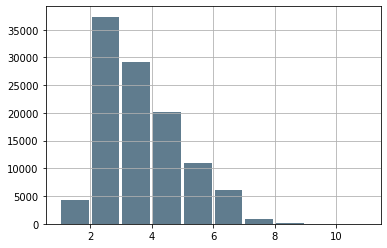

In [44]:
img_attr_count.attribute_id_Count.hist(color='#607c8e', rwidth=0.9)

**Top 30 frequently used labels among these images**

<i> Merge df2 with labels dataset
</i>

In [294]:
#check the dtypes of both
labels_df.dtypes

attribute_id              int64
attribute_name           object
attribute_key            object
attribute_description    object
dtype: object

In [295]:
df2.dtypes

id                    object
attribute_id           int64
attribute_id_Count     int64
dtype: object

In [296]:
df_full_details = pd.merge(df2,labels_df, how="left", on="attribute_id")

In [327]:
df_full_details.head(5)

,id,attribute_id,attribute_id_Count,attribute_name,attribute_key,attribute_description
0,1000483014d91860,147,3,culture::french,culture,french
1,1000483014d91860,616,3,tag::dogs,tag,dogs
2,1000483014d91860,813,3,tag::men,tag,men
3,1000fe2e667721fe,51,4,culture::british,culture,british
4,1000fe2e667721fe,616,4,tag::dogs,tag,dogs


In [328]:
df_full_details.attribute_key.value_counts()

tag        238988
culture    107630
Name: attribute_key, dtype: int64

The number of times attribute tag was used to describe the image is twice as much as culture!

<i> Extract a tabel with attribute number and count of each attribute to find the top 30 attributes </i>

In [297]:
label_count =df_full_details.attribute_id.value_counts().rename_axis('attribute_id').reset_index(name='occurence')

In [298]:
label_count.head(10)

,attribute_id,occurence
0,813,19970
1,1092,14281
2,147,13522
3,189,10375
4,13,9151
5,671,8419
6,51,7615
7,194,7394
8,1059,6564
9,121,6542


In [299]:
label_count.dtypes

attribute_id    int64
occurence       int64
dtype: object

In [300]:
label_count = pd.merge(label_count, labels_df, how="left", on="attribute_id")

In [301]:
label_count.head()

,attribute_id,occurence,attribute_name,attribute_key,attribute_description
0,813,19970,tag::men,tag,men
1,1092,14281,tag::women,tag,women
2,147,13522,culture::french,culture,french
3,189,10375,culture::italian,culture,italian
4,13,9151,culture::american,culture,american


In [320]:
top30 = label_count[['attribute_name', 'occurence']].head(30)

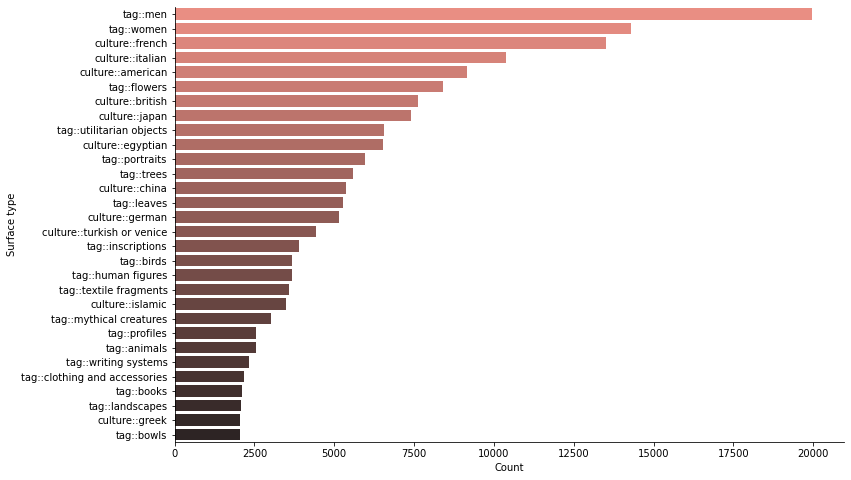

In [322]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(y="attribute_name", x="occurence", data=top30, palette="dark:salmon_r")
ax.set_ylabel("Surface type")
ax.set_xlabel("Count")
sns.despine()
plt.show()

**Bottom 30 frequently used labels among these images**

In [323]:
Bottom30 = label_count[['attribute_name', 'occurence']].tail(30)

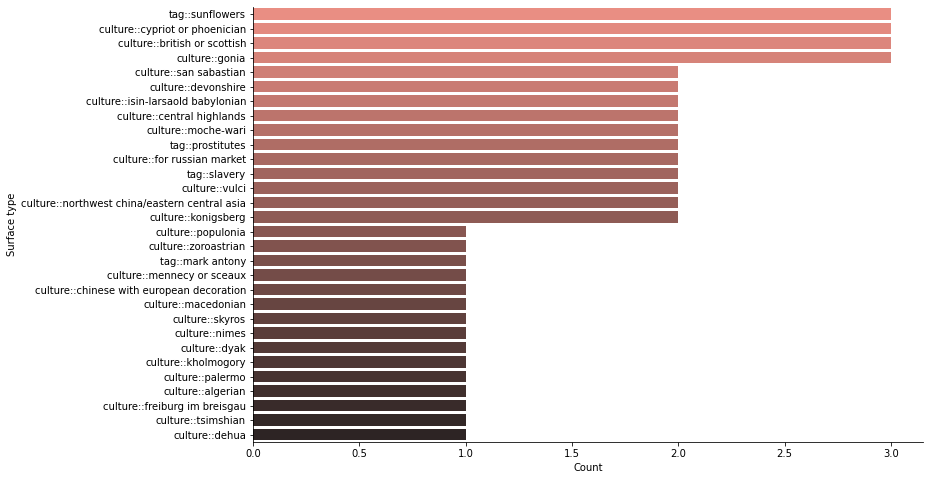

In [324]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(y="attribute_name", x="occurence", data=Bottom30, palette="dark:salmon_r")
ax.set_ylabel("Surface type")
ax.set_xlabel("Count")
sns.despine()
plt.show()

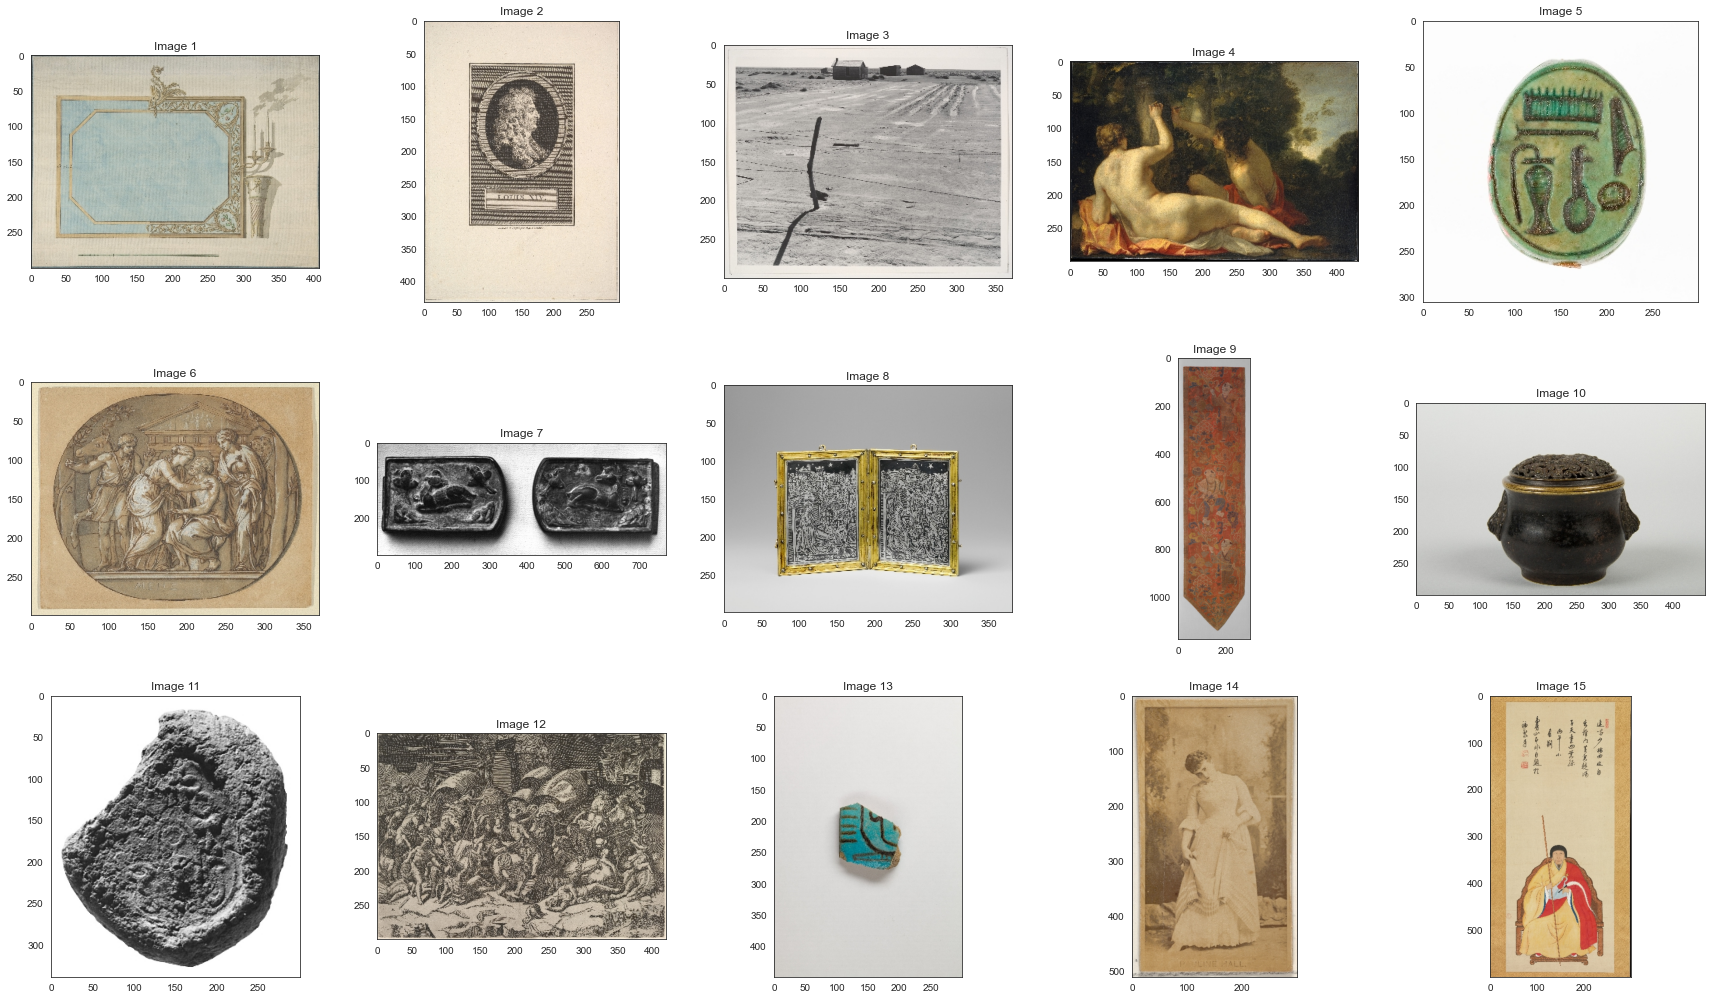

In [348]:
import cv2
import os
count = 1
path = os.listdir("iMet_data/train/")[:15]
plt.figure(figsize=[30,30])
for img_name in path:
    img = cv2.imread("iMet_data/train/%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(5, 5, count)
    plt.imshow(img)
    plt.title("Image %s" % count)
    count += 1
    
plt.show()

**Conclusion**

-	From the above visualizations (Bottom 30 and Top 30 mainly) for the 1103 unique attributes that describe a given image, the dataset is highly imbalanced. For instance, the bottom 30 labels that are assigned to the image are found only 1 to 3. There attributes add to the difficulty of training the model to learn and predict all these 1103 labels effectively.
-	Additionally, the imbalance is also seen as the attributes are classified into two categories (Tags and Culture attributes). The tag attributes are found twice as much when compared to the culture attributes among images.